# LA PROPAGATION DE LA VARICELLE DANS UNE CLASSE MATERNELLE

# *Introduction*

Notre simulation se déroule dans une classe de maternelle de 25 élèves ayant entre 2 et 6 ans, dans un espace fermé pouvant contenir au maximum 49 personnes et pendant une durée de 8 heures. Cette durée correspond à une journée normale d'école : 8h30-16h30
On considère qu'entre chaque matrice, il s'est écoulé 30 minutes. Nous observerons donc l'évolution de notre système sur 16 matrices.

Le voisinage de chaque enfant est définit selon le voisinage de Von neuman, c'est à dire 4 voisins.

La classe est composée de :


- 25 élèves :

  - 12 enfants de 2-3 ans, représentés par des 1 dans la matrice (bleu dans l'animation)
  
  - 13 enfants de 5-6 ans, représentés par des 2 (violet):
  
    - Parmi ces 13, un a la varicelle, il est représenté par un 3 (rouge)
    - Parmi les 24 élèves sains, il y a au maximum 6 pseudo-immunisés:
    
      - Parmi ces 6 tirés au hasard dans la matrice:
      
        - il aura 37% de chance d'être pseudo-immunisé s'il a 2 ans (représentés par des 6 (vert foncé))
        - il aura 63% de chance d'être pseudo-immunisé s'il a 5 ans (représentés par des 5 (vert clair))
        
- 24 unités d'espace vides représentés par des 0 (gris)
    
Au cours de la simulation, chaque nouvelle matrice est mélangée de façon aléatoire pour représenter le déplacement des enfants dans la classe. La propagation de la varicelle se fait selon les paramètres suivants:

- Chaque élève a une chance sur 2 d'être fille ou garçon, il y a donc 1 chance sur 4 que 2 enfants côte à côte soient du même genre.

  - Parmi les non-pseudo-immunisés:
    
    - Si deux enfants côte à côte sont du même genre et ont le même âge, alors la contamination est assurée.
    - S'ils sont du même genre mais n'ont pas le même âge, la contamination se fait avec 70% de chance.
    - S'ils ont le même âge mais pas le même genre, la contamination se fait avec 30% de chance.
    - S'ils n'ont ni le même âge, ni le même genre, la contamination n'est pas nulle mais se fait avec 5% de chance.
        
        
  - Parmi les pseudo-immunisés, il y a 20% de chance qu'un enfant attrape une deuxième fois la varicelle:
    
    - Si deux enfants côte à côte sont du même genre et ont le même âge, alors la contamination se fait avec 20% de chance.
    - S'ils sont du même genre mais n'ont pas le même âge, la contamination se fait avec 70% * 20% = 16% de chance.
    - S'ils ont le même âge mais pas le même genre, la contamination se fait avec 30% * 20% = 6% de chance.
    - S'ils n'ont ni le même âge, ni le même genre, la contamination se fait avec 5% * 20% = 1% de chance.
 

Dans un premier temps, nous simulerons de la manière que nous venons de présenter.
Ensuite nous ferons varier les paramètres du genre et de l'âge

Dans un second temps, nous modifierons la façon dont se déplace les enfants dans la matrice : un jeu de dé est organisé et leur déplacement se retrouve ainsi régulé par les conditions du jeu. Puis, dans cette nouvelle configuration nous ferons varier les principaux paramètres mis en jeu (serre la main avant ou après le jeu).

Enfin, nous observerons de quelle manière influe la taille de l'espace sur la vitesse de propagation de la maladie.



    
    



# I/ Déplacement aléatoire

## a) Paramètres genre et âge

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import random
import copy
%matplotlib notebook

**On commence par initialiser la matrice avec 24 élèves sains: 12 ont 2 ans, 12 ont 5 ans, dont 6 au maximum sont pseudo-immunisés et 1 malade de 5 ans** 

In [2]:
def pos():
    position=[]#liste de positions
    
    for i in range(7):
        for j in range(7):
            position.append([i,j])
            np.random.shuffle(position)
    return (position)

In [3]:
def cases_vides():
    vide=[]
    position=pos()
    i=0
    while (i<24):
        vide.append(position[i])
        i=i+1
        
    return(vide)

La fonction qui initialise la matrice  :
- 1 = enfant de 2-3ans sain (bleu)
- 2= enfant de 5-6ans sain (violet)
- 3= enfant de 5-6 ans malade (rouge)
- 4= enfant de 2-3 ans malade (rose)
- 5= enfant pseudo-immunisé de 5-6 ans (vert clair)
- 6= enfant pseudo-immunisé de 2-3 ans (vert foncé)

In [4]:
from random import randrange # pour le tirage : probabilité d'immunisation
def initialisation_matrice():
    mat=np.ones([7,7])
    cases=cases_vides()
    
    for k in cases:
        [a,b]=k
        mat[a][b]=0
    cases_un = [list(x) for x in np.argwhere(mat == 1)]
    
    cases_unBis=[]    #pour transformer la liste de listes "cases_un" en liste de tuples
    for i in cases_un:
        i=(i[0],i[1])
        cases_unBis.append(i)
    
    
    cinq=[]             # la liste des enfants ayant 5-6 ans
    while len(cinq)<13 :
        choix=random.choice(cases_unBis)
        if choix not in cinq:
            cinq.append(choix)
            
    malade = random.choice(cinq) 
    mat[malade]=3               # On choisit un enfant de 5ans et on admet qu'il est malade
    cinq.remove(malade)
    for position in cinq:
        mat[position]=2        # On identifie les enfants de 5ans
        
    immu=[]                    # on choisit au hasard des enfants que l'on considère éligibles à l'immunité 
    cases_unBis.remove(malade)
    while len(immu)<6:
        choi=random.choice(cases_unBis)
        if choi not in immu :
            immu.append(choi)
            print("{} est éligible à l'immunité".format(choi))
    print("*******************")
            
    for position in immu :  # Parmis ces enfants éligibles à l'immunité (6), ils sont immunisés selon les probabilités p1 et p2
        
        p1= randrange(100)
        p2= randrange(100)
        
        if mat[position]==1:
            print("{}: ({},{})".format(position,mat[position],p1))
            
            if p1>0 and p1<=37:
                mat[position]=6       
        if mat[position]==2:
            print("{}: ({},{})".format(position,mat[position],p2))
            if p2>37 and p2<=100:
                mat[position]=5
    return mat

In [5]:
initialisation_matrice()

(3, 5) est éligible à l'immunité
(3, 1) est éligible à l'immunité
(5, 1) est éligible à l'immunité
(5, 4) est éligible à l'immunité
(0, 5) est éligible à l'immunité
(6, 2) est éligible à l'immunité
*******************
(3, 5): (1.0,15)
(3, 1): (2.0,44)
(5, 1): (1.0,12)
(5, 4): (2.0,34)
(0, 5): (2.0,57)
(6, 2): (2.0,88)


array([[0., 0., 1., 1., 1., 5., 0.],
       [2., 0., 1., 0., 1., 0., 1.],
       [0., 0., 2., 0., 1., 0., 3.],
       [2., 5., 0., 2., 0., 6., 2.],
       [2., 0., 0., 0., 1., 0., 0.],
       [0., 6., 0., 1., 2., 0., 2.],
       [0., 2., 5., 1., 0., 0., 0.]])

**Maintenant, avec notre matrice, nous allons simuler la propagation de la varicelle selon les différents paramètres présentés plus haut**

In [6]:
def dico_voisins():
    elements=[]
    voisins={}
    for i in range(7):
        for j in range(7):
            elements.append((i,j))
            if (i,j)==(0,0):
                voisins[(i,j)]=[(i+1,j),(i,j+1)]
            elif (i,j)==(0,6):
                voisins[(i,j)]=[(i,j-1),(i+1,j)]
            elif (i,j)==(6,0):
                voisins[(i,j)]=[(i-1,j),(i,j+1)]
            elif (i,j)==(6,6):
                voisins[(i,j)]=[(i,j-1),(i-1,j)]
                
            elif (i==0 and j>=1 and j<=5):
                voisins[(i,j)]=[(i+1,j),(i,j+1),(i,j-1)]
                
                
            elif (i==6 and j>=1 and j<=5):
                voisins[(i,j)]=[(i-1,j),(i,j+1),(i,j-1)]
                
                
            elif (j==0 and i>=1 and i<=5):
                voisins[(i,j)]=[(i+1,j),(i,j+1),(i-1,j)]
            
            elif (j==6 and i>=1 and i<=5):
                voisins[(i,j)]=[(i+1,j),(i-1,j),(i,j-1)]
            else:
                voisins[(i,j)]=[(i+1,j),(i-1,j),(i,j-1),(i,j+1)]
    return(voisins)

In [7]:
def mouvement1(mat):
        voisins=dico_voisins()
        liste=[]
        mat=mat.ravel()
        np.random.shuffle(mat)
        mat=mat.reshape(7,7)
        for cle in voisins:
            vois=random.choice(voisins[cle])
            genre1 = random.choice([0,1])
            genre2 = random.choice([0,1])
            # cas 100% de chance d'être contaminé
            if mat[cle]== 3 and mat[vois]==2 and genre1==genre2 :
                mat[vois]=3
                
            if mat[cle]== 4 and mat[vois]==1 and genre1==genre2:
                mat[vois]=4
                
            # cas 70% de chance d'être contaminé
            p1 = randrange(101)
            if mat[cle]==3 and mat[vois]==1 and genre1==genre2 and p1>30 and p1<=100:
                mat[vois]=4
                
    
            if mat[cle]==4 and mat[vois]==2 and genre1==genre2 and p1>30 and p1<=100:
                mat[vois]=3
                
            # cas 30% de chance d'être contaminé
            p2 = randrange(101)
            if mat[cle]==3 and mat[vois]==2 and genre1!=genre2 and p2<30:
                mat[vois]=3
                
            if mat[cle]==4 and mat[vois]==1 and genre1!=genre2 and p2<30:
                mat[vois]=4
                
            #cas 5% de chance d'être contaminé
            p3=randrange(101)  
            if mat[cle]==3 and mat[vois]==1 and genre1!=genre2 and p3<5:
                mat[vois]=4
                
            if mat[cle]==4 and mat[vois]==2 and genre1!=genre2 and p3<5:
                mat[vois]=3
                
            
            #cas de l'immunisation :
            
            # 100% * 20% = 20%
            p4=randrange(101)
            if mat[cle]== 3 and mat[vois]==5 and genre1==genre2 and p4<20 :
                mat[vois]=3
                
            if mat[cle]== 4 and mat[vois]==6 and genre1==genre2 and p4<20:
                mat[vois]=4
            
            #70% * 20% = 16%
            p5 = randrange(101)
            if mat[cle]==3 and mat[vois]==6 and genre1==genre2 and p5<16:
                mat[vois]=4
               
    
            if mat[cle]==4 and mat[vois]==5 and genre1==genre2 and p5<16:
                mat[vois]=3
                
            # 30% * 20% = 6%
            p6 = randrange(101)
            if mat[cle]==3 and mat[vois]==5 and genre1!=genre2 and p2<6:
                mat[vois]=3
                
            if mat[cle]==4 and mat[vois]==6 and genre1!=genre2 and p2<6:
                mat[vois]=4
               
            #5% * 20% = 1%
            p3=randrange(101)  
            if mat[cle]==3 and mat[vois]==6 and genre1!=genre2 and p3<1:
                mat[vois]=4
                
            if mat[cle]==4 and mat[vois]==5 and genre1!=genre2 and p3<1:
                mat[vois]=3
                
            
            
        liste.append(mat.copy())
        return liste

## Animation 1

(4, 3) est éligible à l'immunité
(5, 4) est éligible à l'immunité
(5, 1) est éligible à l'immunité
(0, 6) est éligible à l'immunité
(6, 3) est éligible à l'immunité
(5, 3) est éligible à l'immunité
*******************
(4, 3): (2.0,84)
(5, 4): (1.0,6)
(5, 1): (2.0,95)
(0, 6): (1.0,56)
(6, 3): (2.0,32)
(5, 3): (2.0,67)


<IPython.core.display.Javascript object>


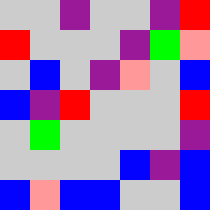

(0, 4) est éligible à l'immunité
(1, 3) est éligible à l'immunité
(4, 5) est éligible à l'immunité
(0, 1) est éligible à l'immunité
(1, 6) est éligible à l'immunité
(6, 1) est éligible à l'immunité
*******************
(0, 4): (2.0,69)
(1, 3): (2.0,33)
(4, 5): (1.0,93)
(0, 1): (1.0,54)
(1, 6): (1.0,82)
(6, 1): (2.0,97)


In [38]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap

#pour enregistrer la video



colors = [(0.8, 0.8, 0.8), (0, 0, 1), (0.6,0.1,0.6), (1, 0, 0), (1,0.6,0.6), (0,1,0), (0.2,0.6,0.2)]  # R -> G -> B
n_bins = [5] 
cmap_name = 'ma_colormap'

#taille
matrice1 = initialisation_matrice()
size = np.array(matrice1.shape)
dpi = 10.0
figsize= size[1]/float(dpi),size[0]/float(dpi)
fig = plt.figure(figsize = figsize, dpi = 30*dpi, facecolor = "white")
fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon = False)

#affichage/couleur
im=plt.imshow(matrice1, interpolation = 'none', cmap =  LinearSegmentedColormap.from_list(
        cmap_name, colors))
plt.xticks([]), plt.yticks([])

#titre
plt.title("La propagation de la varicelle dans une classe de maternelle.")

#légende
grey_patch = mpatches.Patch(color='grey', label='les endroits vides de la classe')
red_patch = mpatches.Patch(color='red', label='les enfants malades(foncé=5 ans, clair = 2ans)')
blue_patch = mpatches.Patch(color='blue', label='les enfants de 2-3 ans sains')
purple_patch = mpatches.Patch(color='purple', label='les enfants de 5-6 ans sains')
green_patch = mpatches.Patch(color='green', label='les enfants immunisés (foncé= 5 ans, clair= 2ans)')

plt.legend(prop={'size': 4},handles=[grey_patch, red_patch, blue_patch, purple_patch, green_patch ],bbox_to_anchor=(-0.5, 1.0, 0., 0))

#animation
import matplotlib.animation as animation


# Initialisation de la matrice
matrice1 = initialisation_matrice()

def update(frame,*fargs ):
    mouvement1(matrice1)
   
    im.set_array(matrice1)
    return [im]

ani = animation.FuncAnimation(fig, update,  interval=1500)


plt.show()

(faire run all si des couleurs bizarres s'affichent dans l'animation)

## b) Sans le paramètre genre

**D'abord on admet que tout le monde est du même genre, donc on enlève la 	condition si genre1==genre2. Ainsi, il nous reste plus que le cas 100% et le cas 70%, pour lesquels on enlève la condition si genre1==genre2.**


In [9]:
def mouvement2(mat):
    
        voisins=dico_voisins()
        liste=[]
    
        mat=mat.ravel()
        np.random.shuffle(mat)
        mat=mat.reshape(7,7)
        for cle in voisins:
            vois=random.choice(voisins[cle])
            genre1 = random.choice([0,1])
            genre2 = random.choice([0,1])
            # cas 100% de chance d'être contaminé
            if mat[cle]== 3 and mat[vois]==2:
                mat[vois]=3
                
            if mat[cle]== 4 and mat[vois]==1 :
                mat[vois]=4
                
            # cas 70% de chance d'être contaminé
            p1 = randrange(100)
            if mat[cle]==3 and mat[vois]==1 and p1>30 and p1<=100:
                mat[vois]=4
                
    
            if mat[cle]==4 and mat[vois]==2 and p1>30 and p1<=100:
                mat[vois]=3
                
            
            #cas de l'immunisation :
            
            # 100% * 20% = 20%
            p4=randrange(100)
            if mat[cle]== 3 and mat[vois]==5  and p4<20 :
                mat[vois]=3
                
            if mat[cle]== 4 and mat[vois]==6  and p4<20:
                mat[vois]=4
            
            #70% * 20% = 16%
            p5 = randrange(100)
            if mat[cle]==3 and mat[vois]==6  and p5<16:
                mat[vois]=4
               
    
            if mat[cle]==4 and mat[vois]==5  and p5<16:
                mat[vois]=3    
        liste.append(mat.copy())
        return liste

# Animation 2

(2, 5) est éligible à l'immunité
(3, 2) est éligible à l'immunité
(0, 6) est éligible à l'immunité
(1, 3) est éligible à l'immunité
(2, 6) est éligible à l'immunité
(5, 5) est éligible à l'immunité
*******************
(2, 5): (1.0,11)
(3, 2): (1.0,61)
(0, 6): (2.0,70)
(1, 3): (1.0,34)
(2, 6): (1.0,16)
(5, 5): (1.0,22)


<IPython.core.display.Javascript object>


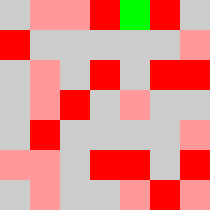

(5, 3) est éligible à l'immunité
(4, 6) est éligible à l'immunité
(0, 0) est éligible à l'immunité
(2, 6) est éligible à l'immunité
(0, 5) est éligible à l'immunité
(2, 3) est éligible à l'immunité
*******************
(5, 3): (2.0,86)
(4, 6): (1.0,27)
(0, 0): (1.0,31)
(2, 6): (2.0,25)
(0, 5): (1.0,43)
(2, 3): (2.0,43)


In [39]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap

#pour enregistrer la video



colors = [(0.8, 0.8, 0.8), (0, 0, 1), (0.6,0.1,0.6), (1, 0, 0), (1,0.6,0.6), (0,1,0), (0.2,0.6,0.2)]  # R -> G -> B
n_bins = [5] 
cmap_name = 'ma_colormap'

#taille
matrice2 = initialisation_matrice()
size = np.array(matrice2.shape)
dpi = 10.0
figsize= size[1]/float(dpi),size[0]/float(dpi)
fig = plt.figure(figsize = figsize, dpi = 30*dpi, facecolor = "white")
fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon = False)

#affichage/couleur
im=plt.imshow(matrice2, interpolation = 'none', cmap =  LinearSegmentedColormap.from_list(
        cmap_name, colors))
plt.xticks([]), plt.yticks([])

#titre
plt.title("La propagation de la varicelle dans une classe de maternelle.")

#légende
grey_patch = mpatches.Patch(color='grey', label='les endroits vides de la classe')
red_patch = mpatches.Patch(color='red', label='les enfants malades(foncé=5 ans, clair = 2ans)')
blue_patch = mpatches.Patch(color='blue', label='les enfants de 2-3 ans sains')
purple_patch = mpatches.Patch(color='purple', label='les enfants de 5-6 ans sains')
green_patch = mpatches.Patch(color='green', label='les enfants immunisés (foncé= 5 ans, clair= 2ans)')

plt.legend(prop={'size': 4},handles=[grey_patch, red_patch, blue_patch, purple_patch, green_patch ],bbox_to_anchor=(-0.5, 1.0, 0., 0))

#animation
import matplotlib.animation as animation


# Initialisation de la matrice
matrice2 = initialisation_matrice()

def update(frame,*fargs ):
    mouvement2(matrice2)
   
    im.set_array(matrice2)
    return [im]

ani = animation.FuncAnimation(fig, update,  interval=1500)

plt.show()

(si ça devient tout vert ou qu'il y a des couleurs bizarres=(à la place du rouge vif à la première itération, il y a un rose), faire run all)

## b) Sans le paramètre âge

**On admet que l'âge n'a pas d'incidence sur la contamination, c'est-à-dire que si on a 2 filles ou 2 garçons côte à côte ils se contamineront forcément sinon, ils ne se contamineront pas.**

In [11]:
def mouvement3(mat):
        voisins=dico_voisins()
        liste=[]
    
        mat=mat.ravel()
        np.random.shuffle(mat)
        mat=mat.reshape(7,7)
        for cle in voisins:
            vois=random.choice(voisins[cle])
            genre1 = random.choice([0,1])
            genre2 = random.choice([0,1])
            # cas 100% de chance d'être contaminé
            if (mat[cle]== 3 or mat[cle]== 4) and mat[vois]==2 and genre1==genre2 :
                mat[vois]=3
                
            if (mat[cle]== 4 or mat[cle]== 3)and mat[vois]==1 and genre1==genre2:
                mat[vois]=4
            
            
                
            
            #cas de l'immunisation :
            
            # 100% * 20% = 20%
            p4=randrange(101)
            if mat[cle]== 3 and mat[vois]==5 and genre1==genre2 and p4<20 :
                mat[vois]=3
                
            if mat[cle]== 4 and mat[vois]==6 and genre1==genre2 and p4<20:
                mat[vois]=4
            
            
        liste.append(mat.copy())
        return liste

# Animation 3

(1, 0) est éligible à l'immunité
(5, 2) est éligible à l'immunité
(3, 4) est éligible à l'immunité
(4, 2) est éligible à l'immunité
(2, 3) est éligible à l'immunité
(3, 3) est éligible à l'immunité
*******************
(1, 0): (1.0,17)
(5, 2): (1.0,15)
(3, 4): (2.0,45)
(4, 2): (2.0,89)
(2, 3): (2.0,55)
(3, 3): (1.0,5)


<IPython.core.display.Javascript object>


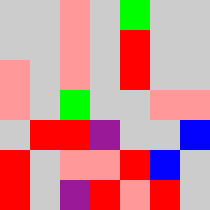

(3, 5) est éligible à l'immunité
(1, 5) est éligible à l'immunité
(3, 0) est éligible à l'immunité
(1, 0) est éligible à l'immunité
(3, 1) est éligible à l'immunité
(5, 4) est éligible à l'immunité
*******************
(3, 5): (1.0,99)
(1, 5): (2.0,74)
(3, 0): (1.0,80)
(1, 0): (2.0,95)
(3, 1): (2.0,0)
(5, 4): (2.0,97)


In [40]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap

#pour enregistrer la video



colors = [(0.8, 0.8, 0.8), (0, 0, 1), (0.6,0.1,0.6), (1, 0, 0), (1,0.6,0.6), (0,1,0), (0.2,0.6,0.2)]  # R -> G -> B
n_bins = [5] 
cmap_name = 'ma_colormap'

#taille
matrice3 = initialisation_matrice()
size = np.array(matrice3.shape)
dpi = 10.0
figsize= size[1]/float(dpi),size[0]/float(dpi)
fig = plt.figure(figsize = figsize, dpi = 30*dpi, facecolor = "white")
fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon = False)

#affichage/couleur
im=plt.imshow(matrice3, interpolation = 'none', cmap =  LinearSegmentedColormap.from_list(
        cmap_name, colors))
plt.xticks([]), plt.yticks([])

#titre
plt.title("La propagation de la varicelle dans une classe de maternelle.")

#légende
grey_patch = mpatches.Patch(color='grey', label='les endroits vides de la classe')
red_patch = mpatches.Patch(color='red', label='les enfants malades(foncé=5 ans, clair = 2ans)')
blue_patch = mpatches.Patch(color='blue', label='les enfants de 2-3 ans sains')
purple_patch = mpatches.Patch(color='purple', label='les enfants de 5-6 ans sains')
green_patch = mpatches.Patch(color='green', label='les enfants immunisés (foncé= 5 ans, clair= 2ans)')

plt.legend(prop={'size': 4},handles=[grey_patch, red_patch, blue_patch, purple_patch, green_patch ],bbox_to_anchor=(-0.5, 1.0, 0., 0))

#animation
import matplotlib.animation as animation


# Initialisation de la matrice
matrice3 = initialisation_matrice()

def update(frame,*fargs ):
    mouvement3(matrice3)
   
    im.set_array(matrice3)
    return [im]

ani = animation.FuncAnimation(fig, update,  interval=1500)


plt.show()

## c) 5% de chance d'être du même genre

**On dit que dans tous les cas, il y a 5% de chance que 2 enfants côte à côte soient du même genre**


In [13]:
def mouvement4(mat):
        voisins=dico_voisins()
        liste=[]
    
        mat=mat.ravel()
        np.random.shuffle(mat)
        mat=mat.reshape(7,7)
        for cle in voisins:
            vois=random.choice(voisins[cle])
            genre1 = randrange(100)
        
            # cas 100% de chance d'être contaminé
            if mat[cle]== 3 and mat[vois]==2 and genre1<5 :
                mat[vois]=3
                
            if mat[cle]== 4 and mat[vois]==1 and genre1<5:
                mat[vois]=4
                
            # cas 70% de chance d'être contaminé
            p1 = randrange(100)
            if mat[cle]==3 and mat[vois]==1 and genre1<5 and p1>30 and p1<=100:
                mat[vois]=4
                
    
            if mat[cle]==4 and mat[vois]==2 and genre1<5 and p1>30 and p1<=100:
                mat[vois]=3
                
            # cas 30% de chance d'être contaminé
            p2 = randrange(100)
            if mat[cle]==3 and mat[vois]==2  and p2<30:
                mat[vois]=3
                
            if mat[cle]==4 and mat[vois]==1  and p2<30:
                mat[vois]=4
                
            #cas 5% de chance d'être contaminé
            p3=randrange(100)  
            if mat[cle]==3 and mat[vois]==1  and p3<5:
                mat[vois]=4
                
            if mat[cle]==4 and mat[vois]==2 and p3<5:
                mat[vois]=3
                
            
            #cas de l'immunisation :
            
            # 100% * 20% = 20%
            p4=randrange(100)
            if mat[cle]== 3 and mat[vois]==5 and genre1<5 and p4<20 :
                mat[vois]=3
                
            if mat[cle]== 4 and mat[vois]==6 and genre1<5 and p4<20:
                mat[vois]=4
            
            #70% * 20% = 16%
            p5 = randrange(100)
            if mat[cle]==3 and mat[vois]==6 and genre1<5 and p5<16:
                mat[vois]=4
               
    
            if mat[cle]==4 and mat[vois]==5 and genre1<5 and p5<16:
                mat[vois]=3
                
            # 30% * 20% = 6%
            p6 = randrange(100)
            if mat[cle]==3 and mat[vois]==5  and p2<6:
                mat[vois]=3
                
            if mat[cle]==4 and mat[vois]==6  and p2<6:
                mat[vois]=4
               
            #5% * 20% = 1%
            p3=randrange(100)  
            if mat[cle]==3 and mat[vois]==6  and p3<1:
                mat[vois]=4
                
            if mat[cle]==4 and mat[vois]==5  and p3<1:
                mat[vois]=3
                
            
            
        liste.append(mat.copy())
        return liste

# Animation 4

(3, 6) est éligible à l'immunité
(4, 5) est éligible à l'immunité
(0, 3) est éligible à l'immunité
(4, 0) est éligible à l'immunité
(2, 0) est éligible à l'immunité
(0, 1) est éligible à l'immunité
*******************
(3, 6): (1.0,6)
(4, 5): (2.0,86)
(0, 3): (1.0,76)
(4, 0): (1.0,43)
(2, 0): (1.0,90)
(0, 1): (1.0,72)


<IPython.core.display.Javascript object>


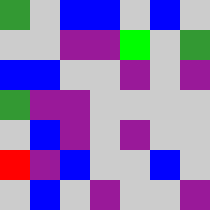

(3, 2) est éligible à l'immunité
(5, 3) est éligible à l'immunité
(3, 1) est éligible à l'immunité
(5, 2) est éligible à l'immunité
(2, 6) est éligible à l'immunité
(2, 2) est éligible à l'immunité
*******************
(3, 2): (1.0,16)
(5, 3): (1.0,17)
(3, 1): (1.0,4)
(5, 2): (2.0,65)
(2, 6): (2.0,8)
(2, 2): (1.0,89)


In [41]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap

#pour enregistrer la video



colors = [(0.8, 0.8, 0.8), (0, 0, 1), (0.6,0.1,0.6), (1, 0, 0), (1,0.6,0.6), (0,1,0), (0.2,0.6,0.2)]  # R -> G -> B
n_bins = [5] 
cmap_name = 'ma_colormap'

#taille
matrice4 = initialisation_matrice()
size = np.array(matrice4.shape)
dpi = 10.0
figsize= size[1]/float(dpi),size[0]/float(dpi)
fig = plt.figure(figsize = figsize, dpi = 30*dpi, facecolor = "white")
fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon = False)

#affichage/couleur
im=plt.imshow(matrice4, interpolation = 'none', cmap =  LinearSegmentedColormap.from_list(
        cmap_name, colors))
plt.xticks([]), plt.yticks([])

#titre
plt.title("La propagation de la varicelle dans une classe de maternelle.")

#légende
grey_patch = mpatches.Patch(color='grey', label='les endroits vides de la classe')
red_patch = mpatches.Patch(color='red', label='les enfants malades(foncé=5 ans, clair = 2ans)')
blue_patch = mpatches.Patch(color='blue', label='les enfants de 2-3 ans sains')
purple_patch = mpatches.Patch(color='purple', label='les enfants de 5-6 ans sains')
green_patch = mpatches.Patch(color='green', label='les enfants immunisés (foncé= 5 ans, clair= 2ans)')

plt.legend(prop={'size': 4},handles=[grey_patch, red_patch, blue_patch, purple_patch, green_patch ],bbox_to_anchor=(-0.5, 1.0, 0., 0))

#animation
import matplotlib.animation as animation


# Initialisation de la matrice
matrice4 = initialisation_matrice()

def update(frame,*fargs ):
    mouvement4(matrice4)
   
    im.set_array(matrice4)
    return [im]

ani = animation.FuncAnimation(fig, update,  interval=1500)
#ani.save('varicelle10.html', writer="html")


plt.show()

# II/ Déplacement régulé

## Modélisation du jeu du dé :

**modélisation du jeu** :

- 24 élèves sont sur les bords de la matrice et un est au centre:
- on prend 4 aux hasard et on les met aux places des voisins de celui qui est au centre.
- chacun lance le dé et pour gagner il faut faire un 6, donc p=1/6
- si un joueur fait un 6, il prend la place de celui qui est au centre, qu'on appellera **roi** et ainsi de suite jusqu'à ce que les 4 aient lancé le dé.

- à la fin du tour, ils reviennent aux cases vides du bord.
- ceux qui sont passés ne peuvent pas repasser une deuxième fois
- le programme se termine lorsque tout le monde à jouer et tout le monde est passé au bout de 6 matrices (6*4 = 24)


### Initialisation de la nouvelle matrice

In [15]:
def initialisation_matrice2():
    mat=np.zeros([7,7])
    cases=cases_vides()
    liste_eleves=[]
    for elem in range(7):
        liste_eleves.append((0,elem))
    for ligne in range(7):
        liste_eleves.append((ligne,6))
    for elem2 in range(7): 
        liste_eleves.append((6,elem2))
    for ligne2 in range(7):
        liste_eleves.append((ligne2,0))
    liste_eleves.append((3,3))
    
    np.random.shuffle(liste_eleves) 
    cinq=[]             # la liste des enfants ayant 5-6 ans
    while len(cinq)<13 :
        choix=random.choice(liste_eleves)
        if choix not in cinq:
            cinq.append(choix)
    deux=[]  
    while len(deux)<12:
        choix=random.choice(liste_eleves)
        if choix not in deux and choix not in cinq:
            deux.append(choix)
    for position2 in deux:
        mat[position2]=1
    
    malade = random.choice(cinq) 
    mat[malade]=3               # On choisit un enfant de 5ans et on admet qu'il est malade
    cinq.remove(malade)
    for position in cinq:
        mat[position]=2        # On identifie les enfants de 5ans
        
    immu=[]                    # on choisit au hasard des enfants que l'on considère éligibles à l'immunité 
    liste_eleves.remove(malade)
    while len(immu)<6:
        choi=random.choice(liste_eleves)
        if choi not in immu :
            immu.append(choi)
            print("{} est éligible à l'immunité".format(choi))
    print("*******************")
            
    for position in immu :  # Parmis ces enfants éligibles à l'immunité (6), ils sont immunisés selon les probabilités p1 et p2
        
        p1= randrange(101)
        p2= randrange(101)
        
        if mat[position]==1:
            print("{}: ({},{})".format(position,mat[position],p1))
            
            if p1>0 and p1<=37:
                mat[position]=6       
        if mat[position]==2:
            print("{}: ({},{})".format(position,mat[position],p2))
            if p2>37 and p2<=100:
                mat[position]=5
    return mat

In [16]:
initialisation_matrice2()

(0, 2) est éligible à l'immunité
(3, 0) est éligible à l'immunité
(6, 1) est éligible à l'immunité
(2, 0) est éligible à l'immunité
(0, 3) est éligible à l'immunité
(0, 4) est éligible à l'immunité
*******************
(0, 2): (1.0,23)
(3, 0): (1.0,2)
(6, 1): (1.0,55)
(2, 0): (1.0,98)
(0, 3): (1.0,35)
(0, 4): (2.0,16)


array([[2., 1., 6., 6., 2., 2., 2.],
       [1., 0., 0., 0., 0., 0., 2.],
       [1., 0., 0., 0., 0., 0., 2.],
       [6., 0., 0., 2., 0., 0., 1.],
       [3., 0., 0., 0., 0., 0., 2.],
       [1., 0., 0., 0., 0., 0., 1.],
       [2., 1., 1., 2., 1., 2., 2.]])

## a) Le joueur serre la main du roi avant de jouer

On admet que les élèves sur les bords ne se contaminent pas car ils ne se touchent pas : ils sont assis sagement sans bouger et regardent la partie.
La contamination se fait pour les joueurs car ils se serrent la main juste avant de jouer et, ainsi, on ne prend plus en compte le genre et l'âge car ils se toucheront dès lors qu'ils seront désignés comme joueurs.


In [33]:
def mouvement5(mat):
    voisins=dico_voisins()
    liste=[]
    voisins_centre=voisins[(3,3)]
    liste_joueurs=[]
    liste_eleves=[]
    for elem in range(7):
        liste_eleves.append((0,elem))
    for ligne in range(7):
        liste_eleves.append((ligne,6))
    for elem2 in range(7): 
        liste_eleves.append((6,elem2))
    for ligne2 in range(7):
        liste_eleves.append((ligne2,0))
        
    
  
    while len(liste_joueurs)<4:
        eleves= random.choice(liste_eleves)
        if eleves not in liste_joueurs:
            liste_joueurs.append(eleves)
        
        
        
    print(liste_joueurs)
    elimines=[]
    copycentre= voisins_centre.copy()   
    for joueurs in liste_joueurs:
        centre=random.choice(copycentre)
        j1=mat[joueurs]
        c1=mat[centre]
        mat[joueurs]=c1
        mat[centre]=j1
        if ((mat[centre]==3 or mat[centre]==4) and mat[(3,3)]==1) or ((mat[(3,3)]==3 or mat[(3,3)]==4) and mat[centre]==1):
            mat[centre]=4
            mat[(3,3)]=4
            print("contaminé1")
        if (mat[centre]==3 or mat[centre]==4) and (mat[(3,3)]==2) or ((mat[(3,3)]==3 or mat[(3,3)]==4) and mat[centre]==2):
            mat[(3,3)]=3
            mat[centre]=3
            print("contaminé2")
        p2=randrange(101)
        if (mat[centre]==3 or mat[centre]==4) and (mat[(3,3)]==5) or ((mat[(3,3)]==3 or mat[(3,3)]==4) and mat[centre]==5) and p2<20:
            mat[(3,3)]=4
            mat[centre]=4
            print("contaminé3")
        if (mat[centre]==3 or mat[centre]==4) and (mat[(3,3)]==6) or ((mat[(3,3)]==3 or mat[(3,3)]==4) and mat[centre]==6) and p2<20:
            mat[(3,3)]=3
            mat[centre]=3
            print("contaminé4")
        copycentre.remove(centre)
        liste_eleves.remove(joueurs)
        elimines.append(joueurs)
        #print(mat)
    print (elimines)


    for J in voisins_centre:
        p1=random.randint(1,7)
        if p1==6:
            #print("{} a gagné".format(J))
            j2=mat[J]
            c2=mat[(3,3)]
            mat[J]=c2
            mat[(3,3)]=j2
    copyelimines=elimines.copy()
    for V in voisins_centre:
        zero=random.choice(copyelimines)
        j3=mat[V]
        c3=mat[zero]
        mat[V]=c3
        mat[zero]=j3
        copyelimines.remove(zero)

# Animation 5

(0, 3) est éligible à l'immunité
(6, 3) est éligible à l'immunité
(6, 6) est éligible à l'immunité
(0, 6) est éligible à l'immunité
(0, 4) est éligible à l'immunité
(0, 0) est éligible à l'immunité
*******************
(0, 3): (1.0,10)
(6, 3): (1.0,71)
(6, 6): (2.0,2)
(0, 6): (2.0,26)
(0, 4): (1.0,50)
(0, 0): (2.0,27)


<IPython.core.display.Javascript object>


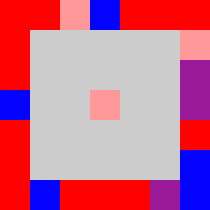

(0, 3) est éligible à l'immunité
(3, 6) est éligible à l'immunité
(4, 6) est éligible à l'immunité
(2, 0) est éligible à l'immunité
(6, 6) est éligible à l'immunité
(0, 5) est éligible à l'immunité
*******************
(0, 3): (2.0,33)
(3, 6): (2.0,26)
(4, 6): (1.0,3)
(2, 0): (1.0,57)
(6, 6): (1.0,55)
(0, 5): (1.0,25)


In [36]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap

#pour enregistrer la video
colors = [(0.8, 0.8, 0.8), (0, 0, 1), (0.6,0.1,0.6), (1, 0, 0), (1,0.6,0.6), (0,1,0), (0.2,0.6,0.2)]  # R -> G -> B
n_bins = [5] 
cmap_name = 'ma_colormap'

#taille
matrice5 = initialisation_matrice2()
size = np.array(matrice5.shape)
dpi = 10.0
figsize= size[1]/float(dpi),size[0]/float(dpi)
fig = plt.figure(figsize = figsize, dpi = 30*dpi, facecolor = "white")
fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon = False)

#affichage/couleur
im=plt.imshow(matrice5, interpolation = 'none', cmap =  LinearSegmentedColormap.from_list(
        cmap_name, colors))
plt.xticks([]), plt.yticks([])

#titre
plt.title("La propagation de la varicelle dans une classe de maternelle.")

#légende
grey_patch = mpatches.Patch(color='grey', label='les endroits vides de la classe')
red_patch = mpatches.Patch(color='red', label='les enfants malades(foncé=5 ans, clair = 2ans)')
blue_patch = mpatches.Patch(color='blue', label='les enfants de 2-3 ans sains')
purple_patch = mpatches.Patch(color='purple', label='les enfants de 5-6 ans sains')
green_patch = mpatches.Patch(color='green', label='les enfants immunisés (foncé= 5 ans, clair= 2ans)')

plt.legend(prop={'size': 4},handles=[grey_patch, red_patch, blue_patch, purple_patch, green_patch ],bbox_to_anchor=(-0.5, 1.0, 0., 0))

#animation
import matplotlib.animation as animation


# Initialisation de la matrice
matrice5 = initialisation_matrice2()

def update(frame,*fargs ):
    mouvement5(matrice5)
    
   
    im.set_array(matrice5)
    return [im]

ani = animation.FuncAnimation(fig, update,  interval=1500)
plt.show()

# b) Le joueur serre la main du roi après avoir gagné

Cette fois-ci, le joueur ne serre la main du roi que s'il a gagné la probabilité de gagner est de 1 chance sur 6:


In [19]:
def mouvement6(mat):
    voisins=dico_voisins()
    liste=[]
    voisins_centre=voisins[(3,3)]
    liste_joueurs=[]
    liste_eleves=[]
    for elem in range(7):
        liste_eleves.append((0,elem))
    for ligne in range(7):
        liste_eleves.append((ligne,6))
    for elem2 in range(7): 
        liste_eleves.append((6,elem2))
    for ligne2 in range(7):
        liste_eleves.append((ligne2,0))
        
    
  
    while len(liste_joueurs)<4:
        eleves= random.choice(liste_eleves)
        if eleves not in liste_joueurs:
            liste_joueurs.append(eleves)
        
        
        
    print(liste_joueurs)
    elimines=[]
    copycentre= voisins_centre.copy()   
    for joueurs in liste_joueurs:
        centre=random.choice(copycentre)
        j1=mat[joueurs]
        c1=mat[centre]
        mat[joueurs]=c1
        mat[centre]=j1
        #1
          
        #2
        copycentre.remove(centre)
        liste_eleves.remove(joueurs)
        elimines.append(joueurs)
        liste.append(mat)
        print(mat)
    print (elimines)


    for J in voisins_centre:
        p1=random.randint(1,7)
        if p1==6:
            print("{} a gagné".format(J))
            j2=mat[J]
            c2=mat[(3,3)]
            mat[J]=c2
            mat[(3,3)]=j2
            print(mat)
            if ((mat[J]==3 or mat[J]==4) and mat[(3,3)]==1):
            
                mat[(3,3)]=4
                print("contaminé1")
                if ((mat[(3,3)]==3 or mat[(3,3)]==4) and mat[J]==1):
            
                    mat[J]=4
                    print("contaminé5")
            elif (mat[J]==3 or mat[J]==4) and (mat[(3,3)]==2):
                mat[(3,3)]=3
                print("contaminé2")
                if (mat[J]==3 or mat[J]==4) and (mat[(3,3)]==2):
                    mat[(3,3)]=3
                    print("contaminé6")
            
            #pseudo-immunisés : 
            p2=randrange(101)
            if (mat[J]==3 or mat[J]==4) and (mat[(3,3)]==5) and p2<20:
                mat[(3,3)]=4
                print("contaminé3")
                if (mat[(3,3)]==3 or mat[(3,3)]==4) and (mat[J]==5) and p2<20:
                    mat[J]=4
                    print("contaminé7")
            elif (mat[J]==3 or mat[J]==4) and (mat[(3,3)]==6) and p2<20:
                mat[(3,3)]=3
                print("contaminé4")
                if (mat[(3,3)]==3 or mat[(3,3)]==4) and (mat[J]==6) and p2<20:
                    mat[J]=3
                    print("contaminé8")    
        else:
            print ("{} n'a pas gagné".format(J))
            
    copyelimines=elimines.copy()
    for V in voisins_centre:
        zero=random.choice(copyelimines)
        print(zero)
        j3=mat[V]
        c3=mat[zero]
        mat[V]=c3
        mat[zero]=j3
        copyelimines.remove(zero)
        print (mat)

# Animation 6

(0, 0) est éligible à l'immunité
(6, 4) est éligible à l'immunité
(6, 5) est éligible à l'immunité
(6, 0) est éligible à l'immunité
(0, 6) est éligible à l'immunité
(0, 1) est éligible à l'immunité
*******************
(0, 0): (2.0,34)
(6, 4): (2.0,18)
(6, 5): (1.0,26)
(6, 0): (2.0,93)
(0, 6): (1.0,57)
(0, 1): (2.0,87)


<IPython.core.display.Javascript object>


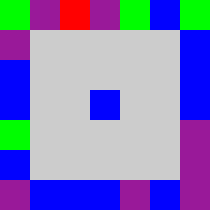

(6, 2) est éligible à l'immunité
(1, 6) est éligible à l'immunité
(3, 0) est éligible à l'immunité
(6, 4) est éligible à l'immunité
(4, 0) est éligible à l'immunité
(0, 0) est éligible à l'immunité
*******************
(6, 2): (2.0,69)
(1, 6): (1.0,56)
(3, 0): (1.0,83)
(6, 4): (2.0,97)
(4, 0): (2.0,77)
(0, 0): (2.0,60)


In [42]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap

#pour enregistrer la video
colors = [(0.8, 0.8, 0.8), (0, 0, 1), (0.6,0.1,0.6), (1, 0, 0), (1,0.6,0.6), (0,1,0), (0.2,0.6,0.2)]  # R -> G -> B
n_bins = [5] 
cmap_name = 'ma_colormap'

#taille
matrice6 = initialisation_matrice2()
size = np.array(matrice6.shape)
dpi = 10.0
figsize= size[1]/float(dpi),size[0]/float(dpi)
fig = plt.figure(figsize = figsize, dpi = 30*dpi, facecolor = "white")
fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon = False)

#affichage/couleur
im=plt.imshow(matrice6, interpolation = 'none', cmap =  LinearSegmentedColormap.from_list(
        cmap_name, colors))
plt.xticks([]), plt.yticks([])

#titre
plt.title("La propagation de la varicelle dans une classe de maternelle.")

#légende
grey_patch = mpatches.Patch(color='grey', label='les endroits vides de la classe')
red_patch = mpatches.Patch(color='red', label='les enfants malades(foncé=5 ans, clair = 2ans)')
blue_patch = mpatches.Patch(color='blue', label='les enfants de 2-3 ans sains')
purple_patch = mpatches.Patch(color='purple', label='les enfants de 5-6 ans sains')
green_patch = mpatches.Patch(color='green', label='les enfants immunisés (foncé= 5 ans, clair= 2ans)')

plt.legend(prop={'size': 4},handles=[grey_patch, red_patch, blue_patch, purple_patch, green_patch ],bbox_to_anchor=(-0.5, 1.0, 0., 0))

#animation
import matplotlib.animation as animation


# Initialisation de la matrice
matrice6 = initialisation_matrice2()

def update(frame,*fargs ):
    mouvement6(matrice6)
    
   
    im.set_array(matrice6)
    return [im]

ani = animation.FuncAnimation(fig, update,  interval=1500)
plt.show()

# Résultats / Graphiques

**Nous représentons l'évolution du nombre de malades au bout de 16 matrices pour chaque cas dans le graphique qui suit.
Pour chaque cas nous faison une moyenne de 10 résultats.**

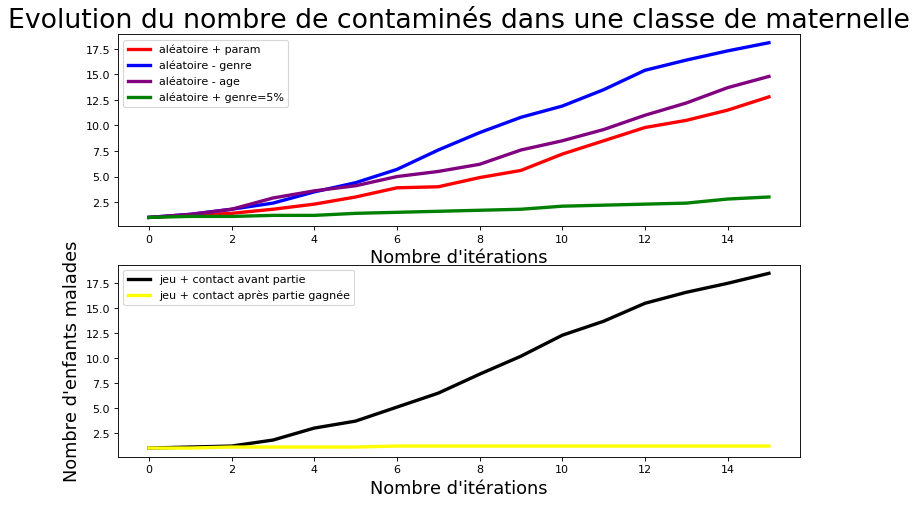

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(11,7), dpi=80)
plt.subplot(211)
plt.plot([1.0,1.2,1.4,1.8,2.3,3.0,3.9,4.0,4.9,5.6,7.2,8.5,9.8,10.5,11.5,12.8],"r", linewidth=3, label="aléatoire + param")
plt.plot([1.0,1.3,1.8,2.4, 3.5,4.4,5.7,7.6,9.3,10.8,11.9,13.5,15.4,16.4,17.3,18.1],"blue", linewidth=3,label="aléatoire - genre")
plt.plot([1.0,1.3,1.8,2.9,3.6,4.1,5.0,5.5,6.2,7.6,8.5,9.6,11.0,12.2,13.7,14.8],"purple", linewidth=3, label="aléatoire - age")
plt.plot([1.0,1.1, 1.1,1.2,1.2,1.4,1.5,1.6,1.7,1.8,2.1,2.2,2.3,2.4,2.8,3.0],"g",linewidth=3, label="aléatoire + genre=5%")

plt.xlabel("Nombre d'itérations",size=16)
plt.title("Evolution du nombre de contaminés dans une classe de maternelle",size=24)
plt.legend()

plt.subplot(212)

plt.plot([1.0,1.1,1.2,1.8,3.0,3.7,5.1,6.5,8.4,10.2,12.3,13.7,15.5,16.6,17.5,18.5],"black",linewidth=3, label="jeu + contact avant partie")
plt.plot([1.0,1.0,1.1,1.1,1.1,1.1,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2],"yellow",linewidth=3, label= "jeu + contact après partie gagnée")
plt.ylabel("Nombre d'enfants malades" , size=16)
plt.xlabel("Nombre d'itérations", size=16)

plt.legend()
#plt.savefig('graphique_varicelle.png', dpi=200)
plt.show()

<IPython.core.display.Javascript object>


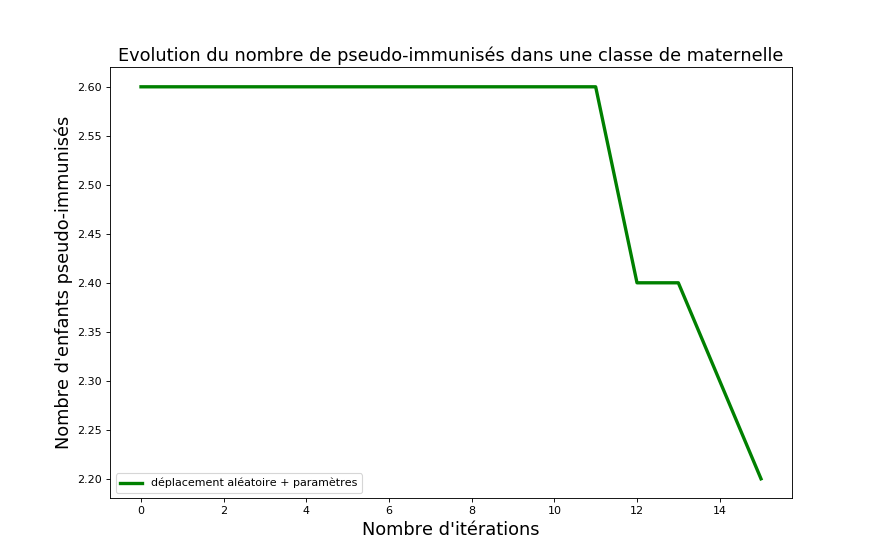

In [45]:
plt.figure(figsize=(11,7), dpi=80)
plt.plot([2.6,2.6, 2.6,2.6,2.6,2.6,2.6,2.6,2.6,2.6,2.6,2.6,2.4,2.4,2.3,2.2],"g", linewidth=3, label="déplacement aléatoire + paramètres")
plt.xlabel("Nombre d'itérations",size=16)
plt.ylabel("Nombre d'enfants pseudo-immunisés" , size=16)
plt.title("Evolution du nombre de pseudo-immunisés dans une classe de maternelle",size=16)
plt.legend()
plt.show()


On remarque que, dans le premier graphique, **le genre influe beaucoup dans la propagation de la varicelle.** En effet, dans le cas où l'on considère que tout le monde est **du même genre**  dans la classe **(courbe bleue)**, on atteint **près de 18 élèves malades en moyenne** à la fin de la journée. A l'inverse, lorsque il y a **5% de chance** que les enfants soient du **même genre (courbe verte)**, la propagation est **extrêmement lente.** Ensuite, lorsque l'on décide que **l'âge des enfants n'a pas d'influence sur leur contact (courbe violette)**, la propagation de la varicelle est **plus rapide que pour la simulation de base (courbe rouge)** mais reste **moins rapide que pour le cas où l'on considère que les enfants ont tous le même genre.**

Ainsi dans le cadre de notre simulation, **le genre a plus d'impact que l'âge.**

Si on s'intéresse à **l'évolution du nombre de pseudo-immunisés**, on voit bien qu'il **stagne longtemps** avant de chuter **(environ 10 itération)** et qu'en moyenne, on a **2 pseudo-immunisés par simulation.** 

En ce qui concerne **les déplacements**, le **déplacement régulé** **(deuxième graphique)** devrait être plus lent, mais la contamination se fait à la **même vitesse** que pour la première simulation. Cependant, **nous avons retiré les paramètres du genre et de l'âge**, ce qui **compenserait** la régulation des déplacements: en effet, si le **roi** se trouve être un **enfant malade**, les 4 joueurs seront contaminés chacun leur tour, indépendamment de leur âge et de leur genre.  Enfin, suivant que le contact se fait **avant la partie(courbe noire)** ou **après avoir gagné la partie(courbe jaune)** a un impact sur la vitesse de propagation car chaque joueur a **une chance sur 6 de gagner** et la propagation est alors extrêment lente.



# III/ Agrandissement de l'espace

On revient au cas du déplacement aléatoire (I) sauf que cette fois-ci nous agrandissons l'espace.

On agrandit l'espace pour qu'il ait 100 cases, il y aura donc 75 espaces vides.

In [22]:
def pos2():
    position=[]#liste de positions
    
    for i in range(10):
        for j in range(10):
            position.append([i,j])
            np.random.shuffle(position)
    return (position)

In [23]:
def cases_vides2():
    vide=[]
    position=pos2()
    i=0
    while (i<75):
        vide.append(position[i])
        i=i+1
        
    return(vide)

In [24]:
from random import randrange # pour le tirage : probabilité d'immunisation
def initialisation_matrice3():
    mat=np.ones([10,10])
    cases=cases_vides2()
    
    for k in cases:
        [a,b]=k
        mat[a][b]=0
    cases_un = [list(x) for x in np.argwhere(mat == 1)]
    
    cases_unBis=[]    #pour transformer la liste de listes "cases_un" en liste de tuples
    for i in cases_un:
        i=(i[0],i[1])
        cases_unBis.append(i)
    
    
    cinq=[]             # la liste des enfants ayant 5-6 ans
    while len(cinq)<13 :
        choix=random.choice(cases_unBis)
        if choix not in cinq:
            cinq.append(choix)
            
    malade = random.choice(cinq) 
    mat[malade]=3               # On choisit un enfant de 5ans et on admet qu'il est malade
    cinq.remove(malade)
    for position in cinq:
        mat[position]=2        # On identifie les enfants de 5ans
        
    immu=[]                    # on choisit au hasard des enfants que l'on considère éligibles à l'immunité 
    cases_unBis.remove(malade)
    while len(immu)<6:
        choi=random.choice(cases_unBis)
        if choi not in immu :
            immu.append(choi)
            print("{} est éligible à l'immunité".format(choi))
    print("*******************")
            
    for position in immu :  # Parmis ces enfants éligibles à l'immunité (6), ils sont immunisés selon les probabilités p1 et p2
        
        p1= randrange(101)
        p2= randrange(101)
        
        if mat[position]==1:
            print("{}: ({},{})".format(position,mat[position],p1))
            
            if p1>0 and p1<=37:
                mat[position]=6       
        if mat[position]==2:
            print("{}: ({},{})".format(position,mat[position],p2))
            if p2>37 and p2<=100:
                mat[position]=5
    return mat
    

In [25]:
initialisation_matrice3()

(6, 7) est éligible à l'immunité
(1, 2) est éligible à l'immunité
(9, 9) est éligible à l'immunité
(4, 4) est éligible à l'immunité
(8, 9) est éligible à l'immunité
(7, 9) est éligible à l'immunité
*******************
(6, 7): (1.0,74)
(1, 2): (2.0,52)
(9, 9): (2.0,75)
(4, 4): (2.0,3)
(8, 9): (1.0,27)
(7, 9): (2.0,83)


array([[0., 0., 0., 1., 0., 0., 1., 0., 0., 1.],
       [0., 0., 5., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 2., 2., 1., 2., 0., 0.],
       [0., 2., 1., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 2., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 3., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 2., 0., 0., 0., 0., 2., 0., 2., 5.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 6.],
       [0., 0., 0., 0., 2., 0., 0., 0., 0., 5.]])

### simulation

In [26]:
def dico_voisins2():
    elements=[]
    voisins={}
    for i in range(10):
        for j in range(10):
            elements.append((i,j))
            if (i,j)==(0,0):
                voisins[(i,j)]=[(i+1,j),(i,j+1)]
            elif (i,j)==(0,9):
                voisins[(i,j)]=[(i,j-1),(i+1,j)]
            elif (i,j)==(9,0):
                voisins[(i,j)]=[(i-1,j),(i,j+1)]
            elif (i,j)==(9,9):
                voisins[(i,j)]=[(i,j-1),(i-1,j)]
                
            elif (i==0 and j>=1 and j<=8):
                voisins[(i,j)]=[(i+1,j),(i,j+1),(i,j-1)]
                
                
            elif (i==9 and j>=1 and j<=8):
                voisins[(i,j)]=[(i-1,j),(i,j+1),(i,j-1)]
                
                
            elif (j==0 and i>=1 and i<=8):
                voisins[(i,j)]=[(i+1,j),(i,j+1),(i-1,j)]
            
            elif (j==9 and i>=1 and i<=8):
                voisins[(i,j)]=[(i+1,j),(i-1,j),(i,j-1)]
            else:
                voisins[(i,j)]=[(i+1,j),(i-1,j),(i,j-1),(i,j+1)]
    return(voisins)

In [27]:
def mouvement7(mat):
        voisins=dico_voisins2()
        liste=[]
        mat=mat.ravel()
        np.random.shuffle(mat)
        mat=mat.reshape(10,10)
        for cle in voisins:
            vois=random.choice(voisins[cle])
            genre1 = random.choice([0,1])
            genre2 = random.choice([0,1])
            # cas 100% de chance d'être contaminé
            if mat[cle]== 3 and mat[vois]==2 and genre1==genre2 :
                mat[vois]=3
                
            if mat[cle]== 4 and mat[vois]==1 and genre1==genre2:
                mat[vois]=4
                
            # cas 70% de chance d'être contaminé
            p1 = randrange(101)
            if mat[cle]==3 and mat[vois]==1 and genre1==genre2 and p1>30 and p1<=100:
                mat[vois]=4
                
    
            if mat[cle]==4 and mat[vois]==2 and genre1==genre2 and p1>30 and p1<=100:
                mat[vois]=3
                
            # cas 30% de chance d'être contaminé
            p2 = randrange(101)
            if mat[cle]==3 and mat[vois]==2 and genre1!=genre2 and p2<30:
                mat[vois]=3
                
            if mat[cle]==4 and mat[vois]==1 and genre1!=genre2 and p2<30:
                mat[vois]=4
                
            #cas 5% de chance d'être contaminé
            p3=randrange(101)  
            if mat[cle]==3 and mat[vois]==1 and genre1!=genre2 and p3<5:
                mat[vois]=4
                
            if mat[cle]==4 and mat[vois]==2 and genre1!=genre2 and p3<5:
                mat[vois]=3
                
            
            #cas de l'immunisation :
            
            # 100% * 20% = 20%
            p4=randrange(101)
            if mat[cle]== 3 and mat[vois]==5 and genre1==genre2 and p4<20 :
                mat[vois]=3
                
            if mat[cle]== 4 and mat[vois]==6 and genre1==genre2 and p4<20:
                mat[vois]=4
            
            #70% * 20% = 16%
            p5 = randrange(101)
            if mat[cle]==3 and mat[vois]==6 and genre1==genre2 and p5<16:
                mat[vois]=4
               
    
            if mat[cle]==4 and mat[vois]==5 and genre1==genre2 and p5<16:
                mat[vois]=3
                
            # 30% * 20% = 6%
            p6 = randrange(101)
            if mat[cle]==3 and mat[vois]==5 and genre1!=genre2 and p2<6:
                mat[vois]=3
                
            if mat[cle]==4 and mat[vois]==6 and genre1!=genre2 and p2<6:
                mat[vois]=4
               
            #5% * 20% = 1%
            p3=randrange(101)  
            if mat[cle]==3 and mat[vois]==6 and genre1!=genre2 and p3<1:
                mat[vois]=4
                
            if mat[cle]==4 and mat[vois]==5 and genre1!=genre2 and p3<1:
                mat[vois]=3
                
            
            
        liste.append(mat.copy())
        return liste

# Animation 7

(0, 8) est éligible à l'immunité
(0, 7) est éligible à l'immunité
(7, 8) est éligible à l'immunité
(5, 3) est éligible à l'immunité
(9, 2) est éligible à l'immunité
(7, 6) est éligible à l'immunité
*******************
(0, 8): (1.0,32)
(0, 7): (2.0,82)
(7, 8): (1.0,83)
(5, 3): (2.0,3)
(9, 2): (1.0,88)
(7, 6): (1.0,79)


<IPython.core.display.Javascript object>


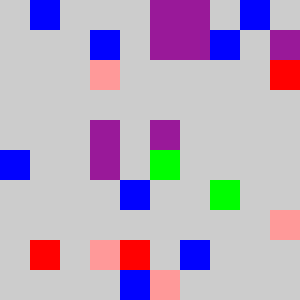

(5, 9) est éligible à l'immunité
(0, 8) est éligible à l'immunité
(7, 4) est éligible à l'immunité
(7, 3) est éligible à l'immunité
(3, 2) est éligible à l'immunité
(5, 3) est éligible à l'immunité
*******************
(5, 9): (1.0,55)
(0, 8): (2.0,38)
(7, 4): (2.0,10)
(7, 3): (2.0,45)
(3, 2): (1.0,96)
(5, 3): (1.0,43)


In [43]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap

#pour enregistrer la video



colors = [(0.8, 0.8, 0.8), (0, 0, 1), (0.6,0.1,0.6), (1, 0, 0), (1,0.6,0.6), (0,1,0), (0.2,0.6,0.2)]  # R -> G -> B
n_bins = [5] 
cmap_name = 'ma_colormap'

#taille
matrice7 = initialisation_matrice3()
size = np.array(matrice7.shape)
dpi = 10.0
figsize= size[1]/float(dpi),size[0]/float(dpi)
fig = plt.figure(figsize = figsize, dpi = 30*dpi, facecolor = "white")
fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon = False)

#affichage/couleur
im=plt.imshow(matrice7, interpolation = 'none', cmap =  LinearSegmentedColormap.from_list(
        cmap_name, colors))
plt.xticks([]), plt.yticks([])

#titre
plt.title("La propagation de la varicelle dans une classe de maternelle.")

#légende
grey_patch = mpatches.Patch(color='grey', label='les endroits vides de la classe')
red_patch = mpatches.Patch(color='red', label='les enfants malades(foncé=5 ans, clair = 2ans)')
blue_patch = mpatches.Patch(color='blue', label='les enfants de 2-3 ans sains')
purple_patch = mpatches.Patch(color='purple', label='les enfants de 5-6 ans sains')
green_patch = mpatches.Patch(color='green', label='les enfants immunisés (foncé= 5 ans, clair= 2ans)')

plt.legend(prop={'size': 4},handles=[grey_patch, red_patch, blue_patch, purple_patch, green_patch ],bbox_to_anchor=(-0.5, 1.0, 0., 0))

#animation
import matplotlib.animation as animation


# Initialisation de la matrice
matrice7 = initialisation_matrice3()

def update(frame,*fargs ):
    mouvement7(matrice7)
   
    im.set_array(matrice7)
    return [im]

ani = animation.FuncAnimation(fig, update,  interval=1500)
#ani.save('varicelle13.html', writer="html")

plt.show()

# Résultats / graphiques

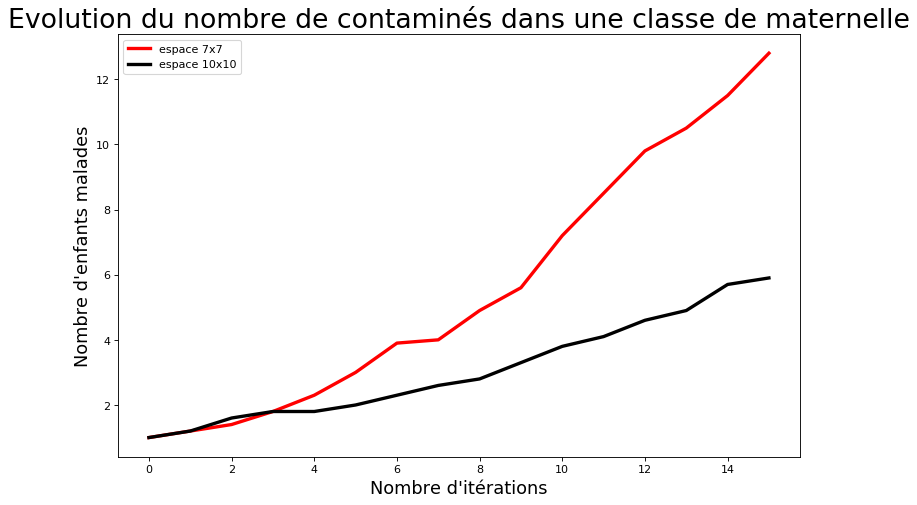

In [29]:
plt.figure(figsize=(11,7), dpi=80)
plt.plot([1.0,1.2,1.4,1.8,2.3,3.0,3.9,4.0,4.9,5.6,7.2,8.5,9.8,10.5,11.5,12.8],"r", linewidth=3, label="espace 7x7")
plt.plot([1.0,1.2,1.6,1.8,1.8,2.0,2.3,2.6,2.8,3.3,3.8,4.1,4.6,4.9,5.7,5.9], "black", linewidth=3, label="espace 10x10")
plt.xlabel("Nombre d'itérations",size=16)
plt.ylabel("Nombre d'enfants malades" , size=16)
plt.title("Evolution du nombre de contaminés dans une classe de maternelle",size=24)
plt.legend()
plt.show()


On voit que la taille de l'espace a une réelle incidence sur la vitesse de propagation de la varicelle. Ainsi, on peut dire que plus l'espace est restreint, plus la propagation est rapide, ce qui est normal car les enfants ont plus l'occasion d'être en contact.

# Conclusion :

Nous avions au départ trois paramètres principaux : le genre, l'âge, et le statut pseudo-immunisé.
Ces paramètres étaient  définis, de manière arbitraire, pour que le genre ait plus d'impact que l'âge sur la contamination et on a décidé qu'il y aurait au maximum 6 immunisés dans la classe.

Par contre, en ce qui concerne la taille de l'espace, on peut dire qu'il a un réel impact sur la vitesse de propagation de la varicelle et son incidence est systématique.